# Time Series Analysis (Without DER)

In [9]:
import pandapower as pp
import pandas as pd
import numpy as np
import pandapower.networks as nw

net_mv = nw.create_cigre_network_mv(with_der=False)  ##importing Cigre MV network 

'''
This pandapower network includes the following parameter tables:
  - switch (8 elements)
  - load (18 elements)
  - ext_grid (1 elements)
  - line (15 elements)
  - trafo (2 elements)
  - bus (15 elements)
  - bus_geodata (15 elements)
'''

'\nThis pandapower network includes the following parameter tables:\n  - switch (8 elements)\n  - load (18 elements)\n  - ext_grid (1 elements)\n  - line (15 elements)\n  - trafo (2 elements)\n  - bus (15 elements)\n  - bus_geodata (15 elements)\n'

In [10]:
## defining manually the tap position for the HV-MV Transformers

net_mv.trafo.loc[0, "tap_side"] = ["lv"]
net_mv.trafo.loc[0, "tap_min"] = [-16]
net_mv.trafo.loc[0, "tap_max"] = [16]
net_mv.trafo.loc[0, "tap_step_percent"] = [0.625]
net_mv.trafo.loc[0, "tap_neutral"] = [0]
net_mv.trafo.loc[1, "tap_side"] = ["lv"]
net_mv.trafo.loc[1, "tap_min"] = [-16]
net_mv.trafo.loc[1, "tap_max"] = [16]
net_mv.trafo.loc[1, "tap_step_percent"] = [0.625]
net_mv.trafo.loc[1, "tap_neutral"] = [0]
net_mv.trafo

name std_type  hv_bus  lv_bus  sn_mva  vn_hv_kv  vn_lv_kv  \
0   Trafo 0-1     None       0       1    25.0     110.0      20.0   
1  Trafo 0-12     None       0      12    25.0     110.0      20.0   

   vk_percent  vkr_percent  pfe_kw  ...  tap_neutral  tap_min tap_max  \
0    12.00107         0.16     0.0  ...          0.0    -16.0    16.0   
1    12.00107         0.16     0.0  ...          0.0    -16.0    16.0   

   tap_step_percent  tap_step_degree  tap_pos  tap_phase_shifter  parallel  \
0             0.625              NaN      NaN              False         1   
1             0.625              NaN      NaN              False         1   

    df  in_service  
0  1.0        True  
1  1.0        True  

[2 rows x 23 columns]

In [11]:
## Creating DER Connections as static generators in MV grid as per the given parameters

pp.create_sgen(net_mv, bus = 1, p_mw = 10, sn_mva=10, name="PV1", type="PV")
pp.create_sgen(net_mv, bus = 1, p_mw = 12, sn_mva=12, name="WKA1", type="WP")
pp.create_sgen(net_mv, bus = 3, p_mw = 0.15, sn_mva=0.15, name="PV3", type="PV")
pp.create_sgen(net_mv, bus = 4, p_mw = 0.3, sn_mva=0.3, name="PV4", type="PV")
pp.create_sgen(net_mv, bus = 8, p_mw = 0.15, sn_mva=0.15, name="PV8", type="PV")
pp.create_sgen(net_mv, bus = 9, p_mw = 0.45, sn_mva=0.45, name="PV9", type="PV")
pp.create_sgen(net_mv, bus = 11, p_mw = 0.3, sn_mva=0.3, name="PV11", type="PV")
pp.create_sgen(net_mv, bus = 7, p_mw = 3, sn_mva=3, name="WKA7", type="WP")
pp.create_sgen(net_mv, bus = 12, p_mw = 15, sn_mva=15, name="PV12", type="PV")
pp.create_sgen(net_mv, bus = 12, p_mw = 12, sn_mva=12, name="WKA12", type="WP")


9

In [12]:
net_lv = nw.create_cigre_network_lv()  ## importing the Cigre LV network

'''
This pandapower network includes the following parameter tables:
  - switch (3 elements)
  - load (15 elements)
  - ext_grid (1 elements)
  - line (37 elements)
  - trafo (3 elements)
  - bus (44 elements)
  - bus_geodata (44 elements)
'''

'\nThis pandapower network includes the following parameter tables:\n  - switch (3 elements)\n  - load (15 elements)\n  - ext_grid (1 elements)\n  - line (37 elements)\n  - trafo (3 elements)\n  - bus (44 elements)\n  - bus_geodata (44 elements)\n'

In [13]:
## Dropping Buses [20:44] to only consider Residential load in LV network

pp.drop_buses(net_lv, net_lv.bus.index[20:44])
net_lv.bus

name  vn_kv type      zone  in_service
0     Bus 0   20.0    b  CIGRE_LV        True
1    Bus R0   20.0    b  CIGRE_LV        True
2    Bus R1    0.4    b  CIGRE_LV        True
3    Bus R2    0.4    m  CIGRE_LV        True
4    Bus R3    0.4    m  CIGRE_LV        True
5    Bus R4    0.4    m  CIGRE_LV        True
6    Bus R5    0.4    m  CIGRE_LV        True
7    Bus R6    0.4    m  CIGRE_LV        True
8    Bus R7    0.4    m  CIGRE_LV        True
9    Bus R8    0.4    m  CIGRE_LV        True
10   Bus R9    0.4    m  CIGRE_LV        True
11  Bus R10    0.4    m  CIGRE_LV        True
12  Bus R11    0.4    m  CIGRE_LV        True
13  Bus R12    0.4    m  CIGRE_LV        True
14  Bus R13    0.4    m  CIGRE_LV        True
15  Bus R14    0.4    m  CIGRE_LV        True
16  Bus R15    0.4    m  CIGRE_LV        True
17  Bus R16    0.4    m  CIGRE_LV        True
18  Bus R17    0.4    m  CIGRE_LV        True
19  Bus R18    0.4    m  CIGRE_LV        True

In [14]:
## Creating DER Connections as static generators in LV grid as per the given parameters

pp.create_sgen(net_lv, bus = 2, p_mw = 0.1, sn_mva=0.1, name="PV_R1", type="PV")
pp.create_sgen(net_lv, bus = 12, p_mw = 0.03, sn_mva=0.03, name="PV_R11", type="PV")
pp.create_sgen(net_lv, bus = 16, p_mw = 0.03, sn_mva=0.03, name="PV_R15", type="PV")
pp.create_sgen(net_lv, bus = 17, p_mw = 0.03, sn_mva=0.03, name="PV_R16", type="PV")
pp.create_sgen(net_lv, bus = 18, p_mw = 0.05, sn_mva=0.05, name="PV_R17", type="PV")
pp.create_sgen(net_lv, bus = 19, p_mw = 0.05, sn_mva=0.05, name="PV_R18", type="PV")

5

In [15]:
## substituting the household load of the MV grid at bus 10 with the LV residential network

net = pp.merge_nets(net_mv, net_lv)   # merging MV and LV networks
pp.fuse_buses(net, b1 = 15, b2 = 10, drop=True, fuse_bus_measurements=True) # Fusing the LV grid at Bus 10 of MV grid

## Plotting the voltage profile for the merged Grid

from pandapower.plotting.plotly import vlevel_plotly
vlevel_plotly(net)

## Running the power flow and Visualizing the results using the pf_res_plotly function

pp.runpp(net)
from pandapower.plotting.plotly import pf_res_plotly
pf_res_plotly(net)


C:\Users\Mridul Mukherjee\AppData\Roaming\Python\Python39\site-packages\pandapower\plotting\plotly\vlevel_plotly.py:83: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.

C:\Users\Mridul Mukherjee\AppData\Roaming\Python\Python39\site-packages\pandapower\plotting\plotly\vlevel_plotly.py:85: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.

C:\Users\Mridul Mukherjee\AppData\Roaming\Python\Python39\site-packages\pandapower\plotting\plotly\vlevel_plotly.py:83: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.

C:\Users\Mridul Mukherjee\AppData\Roaming\Python\Python39\site-packages\pandapower\plotting\plotly\vlevel_plotly.py:85: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.

C:\Users\Mridul Mukherjee\AppData\Roaming\Python\Python39\si

100%|██████████| 96/96 [00:01<00:00, 91.48it/s] 


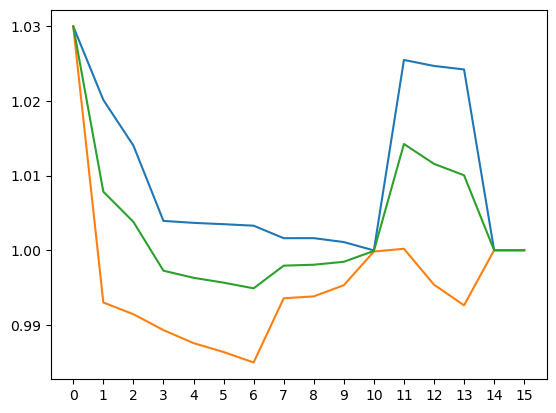

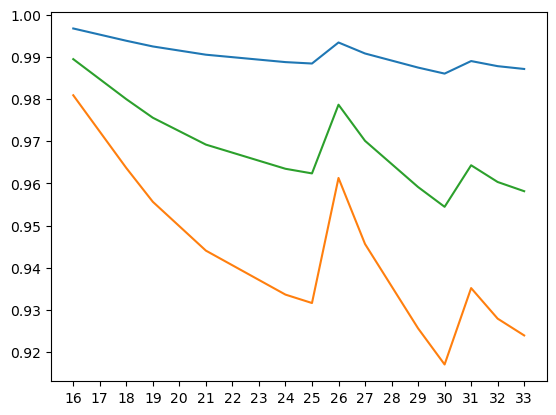

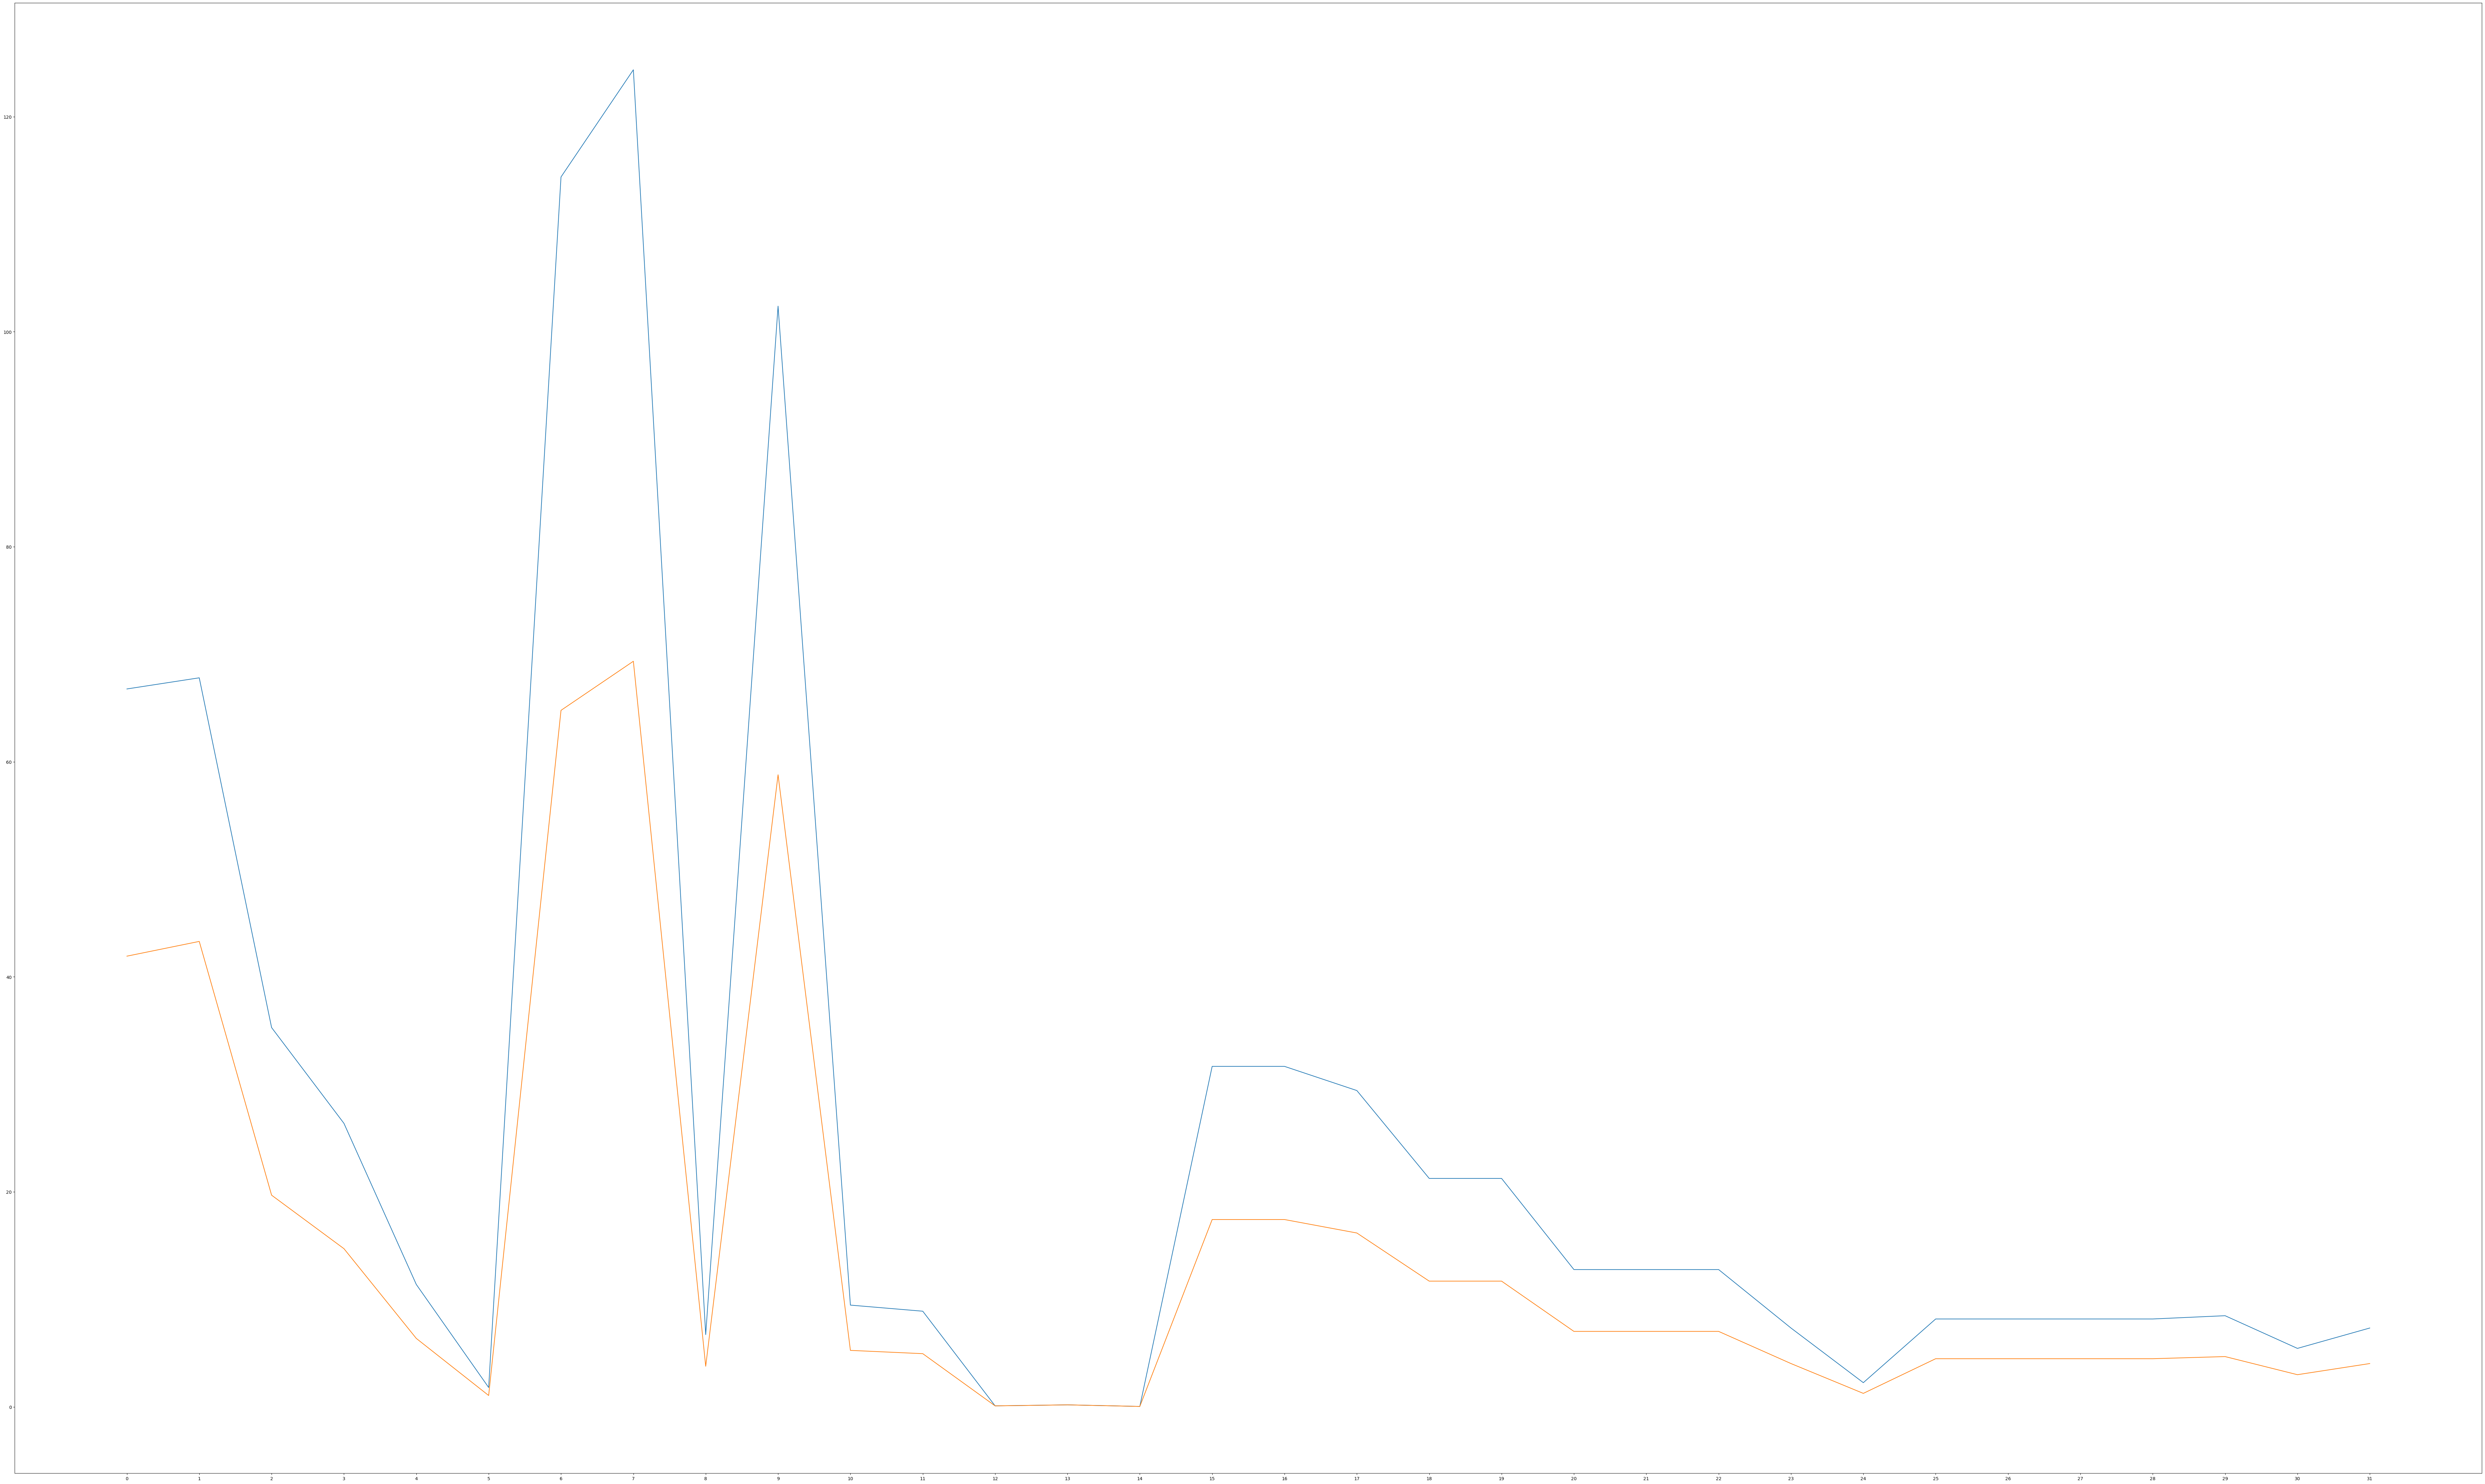

<Figure size 10000x6000 with 0 Axes>

<Figure size 10000x6000 with 0 Axes>

In [16]:
# Time Series Analysis without DER

import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import pandapower as pp
import pandapower.networks as nw
from pandapower import pp_dir
from pandapower.control.controller.const_control import ConstControl
from pandapower.timeseries.data_sources.frame_data import DFData
from pandapower.timeseries.output_writer import OutputWriter
from pandapower.timeseries.run_time_series import run_timeseries

df = pd.read_csv("C:/Users/Mridul Mukherjee/Desktop/H0.csv")  #importing the values from csv file for given H0 (household load)/ G0 (Commercial load) values
val = list(df["Scaled Winter"])   #defining list of the load scaler value for the Summer/Winter/Spring

arr1 = []
arr2 = []

## Put static generators to zero MW in MV and LV level
for gen in net.sgen.index:
    net.sgen.loc[gen,"p_mw"] = 0

#Applying scaler on the load p_mw values to get an array of scaled load p_mw values
for i in val:
    x = [i * j for j in net.load.p_mw]
    arr1.append(x)

#Applying scaler on the load q_mvar values to get an array of scaled load q_mvar values
for i in val:
    x = [i * j for j in net.load.q_mvar]
    arr2.append(x)

n_ts = 96 # defining time steps for running the time series analysis

# Creating load data structures for time series analysis
df1 = pd.DataFrame(arr1,index=list(range(n_ts)), columns=net.load.index) 
df2 = pd.DataFrame(arr2,index=list(range(n_ts)), columns=net.load.index)
ds1 = DFData(df1)
ds2 = DFData(df2)

#Applying const controller on the above defined load data structure 
const_load = ConstControl(net, element='load', element_index=net.load.index, variable='p_mw', data_source=ds1, profile_name=net.load.index)
const_load = ConstControl(net, element='load', element_index=net.load.index, variable='q_mvar', data_source=ds2, profile_name=net.load.index)

#defining OutputWriter location to store the results from running the time series analysis 
ow  = OutputWriter(net, list(range(n_ts)), output_path = "./results/", output_file_type = ".xlsx")

#Running the time series analysis
run_timeseries(net, list(range(n_ts)))


df_v = pd.read_excel("./results/res_bus/vm_pu.xlsx", index_col=0) # reading the bus voltage values from the results for the time steps defined

#Plotting the bus voltage (max, min, mean) values for the MV grid
df_mv = df_v.iloc[:, 0:16]
df_mvmax = df_mv.max('rows')
df_mvmin = df_mv.min('rows')
df_mvmean = df_mv.mean('rows')

plt.plot(range(16), df_mvmax)
plt.plot(range(16), df_mvmin)
plt.plot(range(16), df_mvmean)
plt.xticks(np.arange(0, 16, 1.0))
plt.show()

#Plotting the bus voltage (max, min, mean) values for the LV grid
df_lv = df_v.iloc[:, 16:34]
df_lvmax = df_lv.max('rows')
df_lvmin = df_lv.min('rows')
df_lvmean = df_lv.mean('rows')

plt.plot(range(16,34,1), df_lvmax)
plt.plot(range(16,34,1), df_lvmin)
plt.plot(range(16,34,1), df_lvmean)
plt.xticks(np.arange(16, 34, 1.0))
plt.show()

plt.figure(figsize=(100,60))

#Plotting the line loading (max, mean) values for the merged grid
df_line = pd.read_excel("./results/res_line/loading_percent.xlsx", index_col=0)
df_lmax = df_line.max('rows')
df_lmean = df_line.mean('rows')

plt.plot(range(32), df_lmax)
plt.plot(range(32), df_lmean)
plt.xticks(np.arange(0, 32, 1.0))
plt.show()
plt.figure(figsize=(100,60))

